# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes
northdf=pd.read_csv("NorthCallCenter.csv")
southdf=pd.read_csv("SouthCallCenter.csv")

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
# EDA Question 1A solution below:
count_of_north_reps=northdf['Rep ID'].nunique()
print(f"There are", count_of_north_reps, "reps in the North branch.")

There are 9 reps in the North branch.


#### EDA Question 1B:  How many reps are in the South branch?  

In [3]:
# EDA Question 1B solution Below:
count_of_south_reps=southdf['Rep ID'].nunique()
print(f"There are", count_of_south_reps, "reps in the South branch.")

There are 11 reps in the South branch.


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
# EDA Question 2A solution Below:
northdf.describe()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
# EDA Question 2B solution Below:
southdf.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# EDA Question 3 solution Below:
totaldf=pd.merge(southdf,northdf, how="outer")
calls_by_block=totaldf.groupby('Time Block')[['Calls']].sum()
print(calls_by_block)

            Calls
Time Block       
10:00 AM       99
11:00 AM       56
12:00 PM      120
1:00 PM        40
2:00 PM        65
3:00 PM        73
4:00 PM        53
5:00 PM        43
9:00 AM        10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [7]:
totaldf.info()
#I used the .info function to check if there are any null values in any columns and ensure each column has the correct data type assigned.
#I see the only column with null values is "Incoming Wait Time".
#This function also helps me make sure each of the columns are necessary for analysis (or I could drop them). There aren't any columns I would want to drop at this time.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     208 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: flo

In [8]:
null_df=totaldf[totaldf['Incoming Wait Time'].isnull()]
null_df.sample(10)
#I created a new data frame with only the rows that have a null value for "Incoming Wait Time".
#Then I used Sample to look at those rows. I'm noticing they're all outgoing calls, which makes sense because those calls would have a null wait time.

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
265,132,South,Sales Support,12:00 PM,Outgoing,C,Sharon,NO,1,0,11,2,NaN,4,1
315,157,South,Sales Support,10:00 AM,Outgoing,D,Josh,NO,0,0,11,1,NaN,2,1
412,206,North,Product Support,3:00 PM,Outgoing,B,Xander,NO,0,0,11,1,NaN,2,1
304,152,North,Product Support,11:00 AM,Outgoing,B,Xander,NO,0,0,9,3,NaN,2,1
317,158,South,Sales Support,10:00 AM,Outgoing,C,Sharon,NO,0,0,11,2,NaN,4,1
164,82,North,Sales Support,10:00 AM,Outgoing,A,Cam,NO,1,0,8,1,NaN,2,1
507,262,South,Product Support,2:00 PM,Outgoing,C,Susan,NO,0,0,11,1,NaN,2,1
459,229,South,Product Support,12:00 PM,Outgoing,C,Susan,NO,0,0,12,1,NaN,2,1
402,201,North,Product Support,2:00 PM,Outgoing,A,Joe,NO,0,0,10,3,NaN,3,1
246,123,North,Sales Support,1:00 PM,Outgoing,B,Todd,NO,0,0,12,3,NaN,2,1


In [9]:
totaldf.describe()
#I'm using the .describe function to review the minimums & maximum values for each column, there are no obvious outliers.

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,559.000000,559.000000,559.000000,559.000000,559.000000,208.000000,559.000000,559.0
mean,141.379249,0.028623,0.019678,10.025045,1.912343,3.019231,3.028623,1.0
std,84.340108,0.166893,0.139016,1.405091,0.821644,1.365417,0.831225,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,69.500000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,139.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,209.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [10]:
totaldf['Rep ID'].value_counts().sort_index()
#I'm checking to see if any Rep IDs have duplicates/misspellings.

Rep ID
Alice     20
Amanda    23
Andy      23
Brent     37
Cam       24
Duke      29
Eric      35
George    29
Helga     31
Joe       26
Josh      26
Karl      28
Kate      29
Lilly     30
Randy     33
Sandy     32
Sharon    25
Susan     26
Todd      29
Xander    24
Name: count, dtype: int64

In [11]:
totaldf['Call Purpose'].value_counts().sort_index()
#Doing the same with the Call Purpose column.

Call Purpose
Complaint           51
Product Support    310
Sales Support      198
Name: count, dtype: int64

In [12]:
totaldf['Sale'].value_counts()
#And checking the Sale column. Here I'm seeing there is an erroneous YES.

Sale
NO      542
YES      16
YES       1
Name: count, dtype: int64

In [13]:
totaldf['Sale']=totaldf['Sale'].str.strip()
totaldf['Sale'].value_counts()
#Since I found an extra YES above, I tried stripping the whitespace from everything in the Sale column. Which worked!


Sale
NO     542
YES     17
Name: count, dtype: int64

In [14]:
totaldf.drop_duplicates()
#Here I am removing any duplicate rows. Since this output still contains 559 rows, that tells me there were no duplicates.

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
2,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
3,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
4,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [15]:
# Question 1 solution below

#### Record your answer below:

> Your Answer: I only found null data in the "Incoming Call Wait Time" column. I chose not to edit the data in that column, because it's accurate the data is null. The rows with null values are because they are outgoing calls--which wouldn't have a wait time (0 would be inaccurate).

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [16]:
# Cleaning Question 2 solution below:

##### Record your answer by below:
> Your Answer: There were 2 YES values, which I suspected was because of a leading or trailing whitespace. I used the strip function to eliminate whitespaces from all values in that column, which did remove the separate YES.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [17]:
# Cleaning Question 3 solution below:

##### Record your answer below:
> Your Answer: I did not find any duplicates after using the .drop_duplicates function.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [18]:
# Cleaning Question 4 solution below:

##### Record your answer below:
> Your Answer: I am choosing to believe there is no unnecessary data in the set at this time because the questions we're looking at seem relevant to all columns (at least for the exploration stage).

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [15]:
# Create dataframe for the entire company named df
df=totaldf
#I did this earlier, whoops.


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [16]:
# Manipulation Question solution below: 
rep_calls=df.groupby(['Rep ID', 'Branch'])['Calls'].sum().sort_values(ascending=False)
print(rep_calls)

Rep ID  Branch
Brent   North     37
Eric    South     35
Randy   South     33
Sandy   South     32
Helga   South     31
Lilly   North     30
George  South     29
Kate    South     29
Todd    North     29
Duke    North     29
Karl    South     28
Joe     North     26
Susan   South     26
Josh    South     26
Sharon  South     25
Cam     North     24
Xander  North     24
Amanda  North     23
Andy    North     23
Alice   South     20
Name: Calls, dtype: int64


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent (37 calls)
- South Branch = Eric (35 calls)

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [17]:
# Manipulation Question 2 solution below:

avg_branch_call_abandonment=df.groupby('Branch')['Abandoned'].mean()
print(avg_branch_call_abandonment)
avg_call_abandonment=df['Abandoned'].mean()
print(avg_call_abandonment)

Branch
North    0.028571
South    0.012739
Name: Abandoned, dtype: float64
0.01967799642218247


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
Yes, the South Branch's call abandonment rate is lower than the optimal range. This also brings the Company Wide rate lower than the optimal range as well.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [18]:
# Manipulation Question 3 solution below: 
calls_within_ideal_wait=df[df['Incoming Wait Time']<=2].shape[0]
no_wait_calls=df[df['Incoming Wait Time'].isnull()].shape[0]
total_calls=len(df)
service_level=((calls_within_ideal_wait + no_wait_calls)/total_calls)*100
print(service_level)

77.28085867620752


In [19]:
Ncalls_within_ideal_wait=northdf[northdf['Incoming Wait Time']<=2].shape[0]
Nno_wait_calls=northdf[northdf['Incoming Wait Time'].isnull()].shape[0]
Ntotal_calls=len(northdf)
Nservice_level=((Ncalls_within_ideal_wait + Nno_wait_calls)/Ntotal_calls)*100
print(Nservice_level)

80.0


In [20]:
Scalls_within_ideal_wait=southdf[southdf['Incoming Wait Time']<=2].shape[0]
Sno_wait_calls=southdf[southdf['Incoming Wait Time'].isnull()].shape[0]
Stotal_calls=len(southdf)
Sservice_level=((Scalls_within_ideal_wait + Sno_wait_calls)/Stotal_calls)*100
print(Sservice_level)

75.15923566878982


In [21]:
calls_meeting_service_level=calls_within_ideal_wait + no_wait_calls
print(calls_meeting_service_level)

432


In [22]:
Ncalls_meeting_service_level=Ncalls_within_ideal_wait + Nno_wait_calls
print(Ncalls_meeting_service_level)

196


In [23]:
Scalls_meeting_service_level=Scalls_within_ideal_wait + Sno_wait_calls
print(Scalls_meeting_service_level)

236


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 80%, 196 calls
- South Branch = 75.12%, 236 calls
- Company Wide = 77.28%, 432 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [24]:
# Manipulation Question 4 solution below:
df['Incoming Wait Time'] = df['Incoming Wait Time'].fillna(0)
northdf['Incoming Wait Time'] = northdf['Incoming Wait Time'].fillna(0)
southdf['Incoming Wait Time'] = southdf['Incoming Wait Time'].fillna(0)

In [25]:
average_speed=df['Incoming Wait Time'].mean()
print(average_speed)

1.1234347048300537


In [26]:
south_average_speed=southdf['Incoming Wait Time'].mean()
print(south_average_speed)

1.2038216560509554


In [27]:
north_average_speed=northdf['Incoming Wait Time'].mean()
print(north_average_speed)

1.0204081632653061


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.02 seconds
- South Branch in seconds = 1.2  seconds
- Company Wide in seconds =  1.12 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\User\AppData\Local\Temp\ipykernel_18960\3588714925.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C'), Text(3, 0, 'D')])

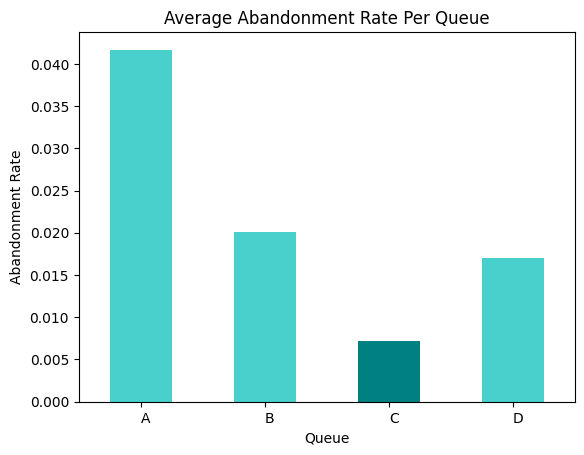

In [83]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
rates_series=pd.Series(abandonment_rates)
colors=['mediumturquoise','mediumturquoise','teal','mediumturquoise']
rates_series.plot.bar(color=colors)
plt.title("Average Abandonment Rate Per Queue")
plt.ylabel("Abandonment Rate")
plt.xlabel("Queue")
plt.xticks(rotation=0, ha='left')



##### Record your answer below:

> Chart style you chose and why: 
I chose a bar chart because there are 4 distinct categories (queues A, B, C, and D) that are being compared to each other. I decided to emphasize the highest performing queue (the one with the lowest abandonment rate) using color.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

Text(0.5, 1.0, 'North Branch: Service Level % vs Answer Speed')

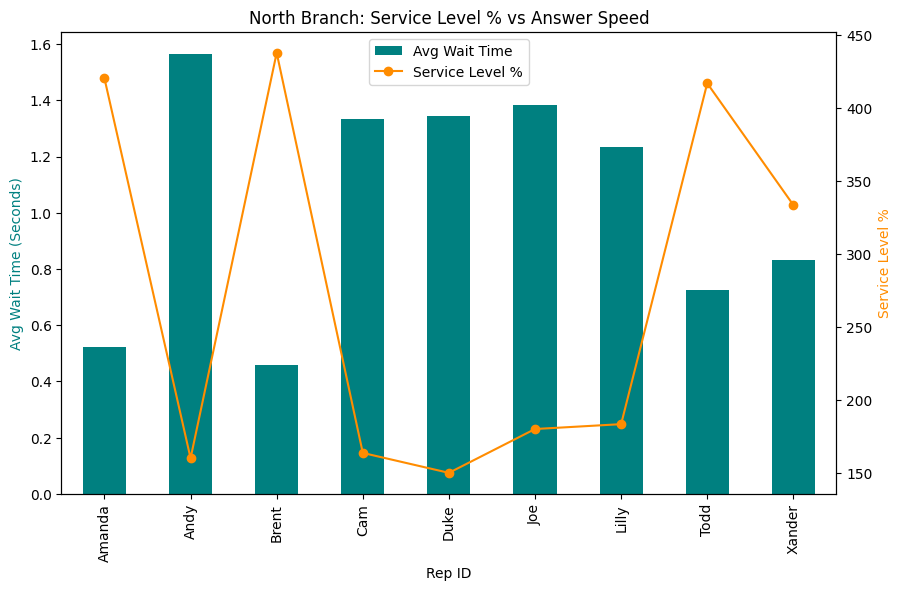

In [86]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = northdf.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = northdf[northdf["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = northdf[northdf["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level=service_level.reset_index()
north_plt=north_plt.reset_index()
ax=north_plt.plot.bar(x='Rep ID', y='Incoming Wait Time', color='teal', figsize=(10,6), label='Avg Wait Time', legend=False)
ax2=ax.twinx()
service_level.plot(kind='line',x='Rep ID', y='Service Level %', color='darkorange', marker='o', ax=ax2, label='Service Level %')
lines,labels=ax.get_legend_handles_labels()
lines2,labels2=ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')
ax.set_ylabel('Avg Wait Time (Seconds)', color='teal')
ax2.set_ylabel('Service Level %', color='darkorange')
plt.title('North Branch: Service Level % vs Answer Speed')


##### Record your answer below:

> Chart style you chose and why: I chose to combine a bar chart with a line graph so that both Service Level and Average Wait Time could been seen in comparison per Rep. This required two y-axes, so I labelled them according to color to help the viewer understand how to read the chart.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


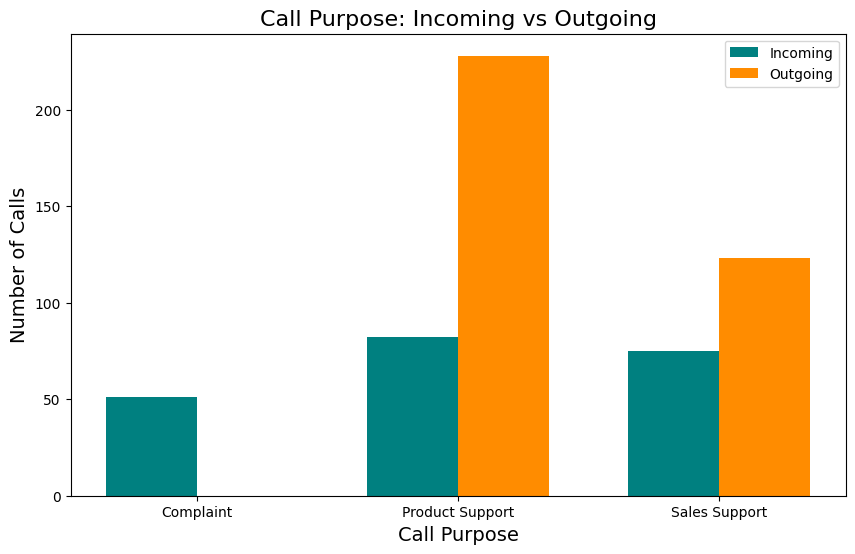

In [98]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = totaldf.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
data = {
    'Call Purpose': ['Complaint', 'Product Support', 'Sales Support'], 
    'Incoming': [51,82,75],
    'Outgoing': [np.nan,228,123]
}
call_purpose=['Complaint', 'Product Support', 'Sales Support']
df=pd.DataFrame(data)
df=df.set_index('Call Purpose')
fig, ax= plt.subplots(figsize=(10,6))
bar_width=0.35
index=np.arange(len(df))
ax.bar(index-bar_width/2, df['Incoming'], bar_width, label='Incoming', color='teal')
outgoing_values=[v if not pd.isna(v) else 0 for v in df['Outgoing']]
ax.bar(index + bar_width/2, outgoing_values, bar_width, label='Outgoing', color='darkorange')
ax.set_xlabel('Call Purpose', fontsize=14)
ax.set_ylabel ('Number of Calls', fontsize=14)
ax.set_title('Call Purpose: Incoming vs Outgoing', fontsize=16)
ax.set_xticks(index,labels=call_purpose)
ax.legend()


##### Record your answer below:

> Chart style you chose and why: I chose a grouped bar chart because there are groupings of data (in the form of call purpose ) and incoming vs. outgoing for each. There are no outgoing calls for complaints (which makes sense), so there is no comparison for that column. Contrasting colors were chosen for visual appeal and to reinforce the categories.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
The North branch answers calls slightly faster (1.02 seconds vs. the South branch at 1.2 seconds). The North branch also answers 80% of calls within 2 seconds compared to the South branch at 75% of calls. The North branch's call abandonment rate was within the optimal range of 2-5%, whereas the South branch was lower than the optimal range. I will note I don't fully understand why the optimal range wouldn't be 0% (or, say, 0-5%) but am operating on the assumption with the given information that any number outside that optimal range is failure. Due to all these reasons, I would propose the North branch is operating more efficiently.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: There are 9 reps in the North branch and 11 reps in the South branch, however the North branch is operating more efficiently than the South. I would propose the South branch could use extra help. They don't necessarily need additional staff (as they already have more), but perhaps more training. There could also be extenuating factors that require more consideration--are there differences in the callers between the branches that could affect efficiency? Are there differences in staff (experience, compensation, etc.)? Having some of the South branch reps visit the North branch could help in determining strategies to improve efficiency.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
As mentioned in Summary Question 2, it would be helpful to investigate deeper into why the North and South branches have their differences. More information about callers and staff needs would be helpful in this regard. Even aspects like technology could affect the difference in numbers--perhaps the North branch has a more upgraded phone system or the South has poorer internet connectivity. These small differences could make an impact on performance.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: